In [1]:
from common import colors, pvalue_thresholds

In [2]:
import os
os.chdir(os.path.join('..', '..', '..'))
print(os.getcwd())

/Users/eharkin/Documents/projects/5HTGIF


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from ezephys import pltools
from statannot import add_stat_annotation

from grr.Tools import stripNan

In [4]:
IMG_PATH = os.path.join('figs', 'ims', 'writeup', 'fig1')
NOTEBOOK_PATH = os.path.join('figs', 'scripts', 'writeup')

plt.style.use(os.path.join(NOTEBOOK_PATH, 'publication_figure_style.dms'))

# Load $f/I$ parameters

In [5]:
data = {
    celltype: pd.read_csv(os.path.join('data', 'processed', celltype, 'current_steps_gain.csv'))
    for celltype in ['5HT', 'GABA', 'mPFC']
}
for celltype in data:
    data[celltype]['cell_type'] = celltype
param_df = pd.concat([data[celltype] for celltype in data], axis=0)
param_df.reset_index(drop=True, inplace=True)

param_df

,gain,is_monotonic,rheobase,cell_type
0,0.074977,True,8.766868,5HT
1,0.037190,True,54.663452,5HT
2,0.085683,True,60.045643,5HT
3,0.042441,True,64.524641,5HT
4,0.106712,True,16.735346,5HT
5,0.039304,True,59.471666,5HT
6,0.044860,True,44.279461,5HT
7,0.051668,True,8.477907,5HT
8,0.052506,True,50.878105,5HT
9,0.030544,True,30.874911,5HT


In [6]:
param_df['gain'] *= 1e3  # Convert to Hz/nA from Hz/pA

## Summary statistics

In [7]:
param_df.groupby('cell_type').mean()

,gain,is_monotonic,rheobase
cell_type,,,
5HT,52.244907,1.000000,33.793841
GABA,138.857784,0.500000,11.318860
mPFC,61.148129,0.714286,48.392598


In [8]:
param_df.groupby('cell_type').std()

,gain,is_monotonic,rheobase
cell_type,,,
5HT,22.186426,0.000000,21.020583
GABA,87.186306,0.518875,15.987811
mPFC,6.612934,0.487950,38.276432


In [9]:
param_df.groupby('cell_type').sem()

,gain,is_monotonic,rheobase
cell_type,,,
5HT,5.380999,0.000000,5.098240
GABA,32.953326,0.138675,4.272922
mPFC,2.957394,0.184428,14.467131


In [10]:
param_df.groupby('cell_type').count()

,gain,is_monotonic,rheobase
cell_type,,,
5HT,17,17,17
GABA,7,14,14
mPFC,5,7,7


# Figures

In [9]:
figsize=(0.9, 1)

## Gain

First, test whether gain depends on cell type to decide whether pairwise comparisons are warranted.

In [10]:
stats.kruskal(
    stripNan(param_df.loc[param_df['cell_type'] == '5HT', 'gain']),
    stripNan(param_df.loc[param_df['cell_type'] == 'GABA', 'gain']),
    stripNan(param_df.loc[param_df['cell_type'] == 'mPFC', 'gain']),
)

KruskalResult(statistic=8.950449145175313, pvalue=0.011387664480056054)

p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
o: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
5HT v.s. GABA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.293e-02 U_stat=1.700e+01
GABA v.s. mPFC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.540e-01 U_stat=3.000e+01
5HT v.s. mPFC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.487e-01 U_stat=2.500e+01


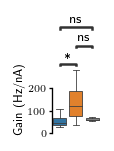

In [11]:
plt.figure(figsize=figsize)

plt.subplot(111)
plt.subplots_adjust(left=0.5, right=0.95, top=0.6, bottom=0.05)
ax = sns.boxplot(
    'cell_type', 
    'gain', 
    data=param_df, 
    order=['5HT', 'GABA', 'mPFC'], 
    palette=[colors['ser'], colors['som'], colors['pyr']]
)
plt.xlabel('')
add_stat_annotation(
    ax=ax,
    x='cell_type', 
    y='gain', 
    data=param_df, 
    order=['5HT', 'GABA', 'mPFC'], 
    box_pairs=[('5HT', 'GABA'), ('5HT', 'mPFC'), ('GABA', 'mPFC')],
    pvalue_thresholds=pvalue_thresholds,
    comparisons_correction='bonferroni',
    test='Mann-Whitney',
    loc='outside'
)
plt.ylim(0, plt.ylim()[1])
plt.ylabel(r'Gain (Hz/nA)')
plt.xticks([])
pltools.hide_border('trb', trim=True)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'gain_comparison.png'))
    plt.savefig(os.path.join(IMG_PATH, 'gain_comparison.svg'))

## Rheobase

In [12]:
stats.kruskal(
    stripNan(param_df.loc[param_df['cell_type'] == '5HT', 'rheobase']),
    stripNan(param_df.loc[param_df['cell_type'] == 'GABA', 'rheobase']),
    stripNan(param_df.loc[param_df['cell_type'] == 'mPFC', 'rheobase']),
)

KruskalResult(statistic=10.78120640968939, pvalue=0.004559222361101637)

p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
o: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
5HT v.s. GABA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.058e-02 U_stat=1.930e+02
GABA v.s. mPFC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.324e-02 U_stat=1.900e+01
5HT v.s. mPFC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.323e-01 U_stat=3.600e+01


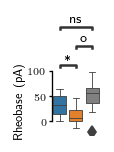

In [13]:
plt.figure(figsize=figsize)

plt.subplot(111)
plt.subplots_adjust(left=0.5, right=0.95, top=0.6, bottom=0.05)
ax = sns.boxplot(
    'cell_type', 
    'rheobase', 
    data=param_df, 
    order=['5HT', 'GABA', 'mPFC'], 
    palette=[colors['ser'], colors['som'], colors['pyr']]
)
plt.xlabel('')
add_stat_annotation(
    ax=ax,
    x='cell_type', 
    y='rheobase', 
    data=param_df, 
    order=['5HT', 'GABA', 'mPFC'], 
    box_pairs=[('5HT', 'GABA'), ('5HT', 'mPFC'), ('GABA', 'mPFC')],
    pvalue_thresholds=pvalue_thresholds,
    comparisons_correction='bonferroni',
    test='Mann-Whitney',
    loc='outside'
)
plt.ylabel(r'Rheobase (pA)')
plt.xticks([])
pltools.hide_border('trb', trim=True)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'rheobase_comparison.png'))
    plt.savefig(os.path.join(IMG_PATH, 'rheobase_comparison.svg'))

## Proportion of cells with monotonic $f/I$ curves

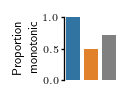

In [14]:
plt.figure(figsize=(1, 1))

plt.subplot(111)
plt.subplots_adjust(left=0.5, right=0.95, top=0.6, bottom=0.05)
sns.barplot(
    'cell_type', 
    'is_monotonic', 
    data=param_df, 
    order=['5HT', 'GABA', 'mPFC'], 
    palette=[colors['ser'], colors['som'], colors['pyr']], 
    ci=None
)
plt.ylabel('Proportion\nmonotonic')
plt.xlabel('')
plt.xticks([])
pltools.hide_border('trb', trim=True)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'monotonic_comparison.png'))
    plt.savefig(os.path.join(IMG_PATH, 'monotonic_comparison.svg'))

### Family-wise test

First, test contingency between monotonicity and cell-type.

In [15]:
contingency = [
    [sum(param_df.loc[param_df['cell_type'] == '5HT', 'is_monotonic']),
    sum(~param_df.loc[param_df['cell_type'] == '5HT', 'is_monotonic'])],
    [sum(param_df.loc[param_df['cell_type'] == 'GABA', 'is_monotonic']),
    sum(~param_df.loc[param_df['cell_type'] == 'GABA', 'is_monotonic'])],
    [sum(param_df.loc[param_df['cell_type'] == 'mPFC', 'is_monotonic']),
    sum(~param_df.loc[param_df['cell_type'] == 'mPFC', 'is_monotonic'])],
]
stats.chi2_contingency(contingency)

(10.732348111658457,
 0.0046719718635579895,
 2,
 array([[12.97368421,  4.02631579],
        [10.68421053,  3.31578947],
        [ 5.34210526,  1.65789474]]))

Second number is the p-value.

### Pairwise tests

In [16]:
def generate_all_pairs(values):
    pairs = []
    for i in range(len(values) - 1):
        for j in range(i + 1, len(values)):
            pairs.append((values[i], values[j]))
    return pairs

generate_all_pairs(['one', 'two', 'three'])

[('one', 'two'), ('one', 'three'), ('two', 'three')]

In [17]:
def pairwise_proportion_test(grouping_variable, outcome_variable, data):
    """Bonferroni-corrected pairwise Chi^2 contingency tests."""
    pairs = generate_all_pairs(data[grouping_variable].unique())
    p_values = []
    for group1, group2 in pairs:
        contingency = [
            [sum(data.loc[data[grouping_variable] == group1, outcome_variable]),
            sum(~data.loc[data[grouping_variable] == group1, outcome_variable])],
            [sum(data.loc[data[grouping_variable] == group2, outcome_variable]),
            sum(~data.loc[data[grouping_variable] == group2, outcome_variable])]
        ]
        pvalue = stats.chi2_contingency(contingency)[1]
        p_values.append(pvalue * len(pairs))  # Bonferroni correction applied here.
    result = pd.DataFrame({'pair': pairs, 'p_value': p_values})
    return result

In [18]:
pairwise_proportion_test('cell_type', 'is_monotonic', param_df)

,p_value,pair
0,0.409100,"(5HT, mPFC)"
1,0.011859,"(5HT, GABA)"
2,1.919982,"(mPFC, GABA)"
